# Описание проекта:
> Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
# Описание данных:
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    


# План проекта:
    1. Открытие и изучение данных

    2. Предобработка данных

    3. Исследовательский анализ  

        3.1 Анализ дат выпуска игр(в годах).  

        3.2 Характерный срок, за какой появляются новые и исчезают старые платформы. Период за который можно построить прогноз на 2017 год. Потенциально прибыльные платформы.  

        3.3 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  

        3.4 Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.  

        3.5 Описание самых прибыльных жанров.  
  
    4. Составление портрета пользователя каждого региона (NA, EU, JP)  

        4.1 Самые популярные платформы (топ-5).  

        4.2 Самые популярные жанры (топ-5).  

        4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе  
  
  
    5. Проверка гипотез  

        5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

        5.2 Средние пользовательские рейтинги жанров Action и Sports разные.  
  
    6. Общий вывод

# 1. Открытие и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('C:/Users/weeqe/projects/sample/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 2. Предобработка данных

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Для начала изменим названия столбцов, а именно приведем к нижнему регистру.

In [7]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

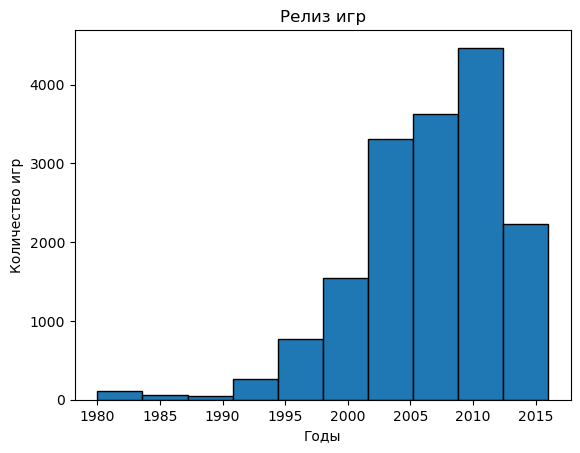

In [8]:
plt.hist(data['year_of_release'],edgecolor='black', bins =10)
plt.title('Релиз игр') 
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()


In [9]:
def pass_value_barh(df):
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16, grid=True)
            .set_title('Доля пропусков по столбцам в процентах' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    

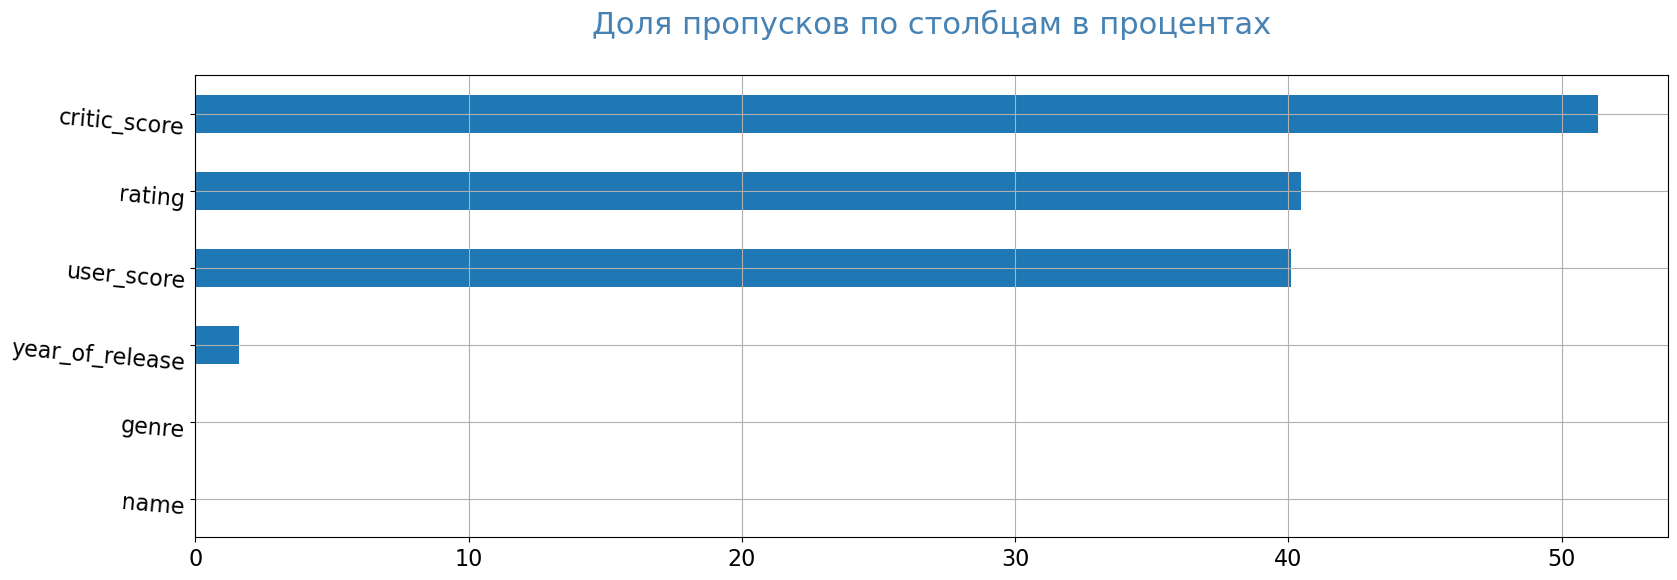

In [10]:
pass_value_barh(data)

Взглянем на долю пропусков в процентах по столбцам. В столбце **year_of_release** менее 2 процентов пропусков. Можно избавиться от них.

In [11]:
data = data.dropna(subset=['year_of_release'])

Удаляем строки с пропусками в столбце `year_of_release`.

In [12]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Выведем строки с пропусками в столбце **name**, таких всего две и в них также пропуски в столбце **genre**.

In [13]:
data = data.dropna(subset=['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Удалим строки с пропусками в столце **name** и заметим, что пропуски в столбце **genre** тоже пропали.

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Взглянем на столбец **user_score**, по логике в столбце должны быть данные типа float.  
Оказывается столбец заполнен не цифрами, а строками, также имеет значение *'tbd'*, что означает, что данных в данный момент нет.

In [15]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

Т.к. *'tnd'* означает, что данных нет, заменяем это значение на пропуск.  
Преобразуем все значения столбца в цифры и изменим тип данных на float.

In [16]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)

Добавляем столбец с **total_sales** суммарными продажами игр во всех регионах.

In [17]:
data['year_of_release'] = data['year_of_release'].astype('int')

# 3. Исследовательский анализ

## 3.1 Анализ дат выпуска игр(в годах).

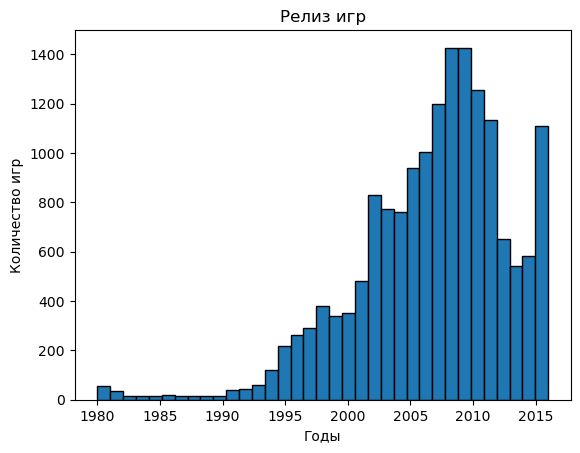

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0.001200,"1,981.00",0.00,0.00,0.00,0.00,20.00,0.70,0.01
0.015000,"1,991.00",0.00,0.00,0.00,0.00,34.00,2.80,0.01
0.500000,"2,007.00",0.08,0.02,0.00,0.01,71.00,7.50,0.17
0.985000,"2,016.00",2.25,1.49,0.98,0.48,93.00,9.10,4.43
0.998800,"2,016.00",9.02,5.74,4.00,1.94,97.00,9.40,18.75


In [18]:
plt.hist(data['year_of_release'], edgecolor='black', bins =35)
plt.title('Релиз игр') 
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

(
    data.quantile([0.0012, 0.015, .5, .985, .9988]) # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

Игры продавались не равными порциями каждый год, имеются ярко выраженные годы.  
Квартили помогают нам  увидеть редкости, а именно в данном случае около 1.5% всех игр было выпущено до 1991 года.
Важны будут данные за период с 1992 по 2016 год.

In [19]:
data = data.query('year_of_release > 1990')

Избавимся от выбросов.

## 3.2 Характерный срок, за какой  появляются новые и исчезают старые платформы. Период за который можно построить прогноз на 2017 год. Потенциально прибыльные платформы.

In [20]:
top_platform = (
                 data.groupby('platform', as_index=False)
                 .agg({'total_sales': 'sum'})
                 .sort_values('total_sales', ascending=False).head(17)
)
top_platform_list = top_platform['platform']. tolist()

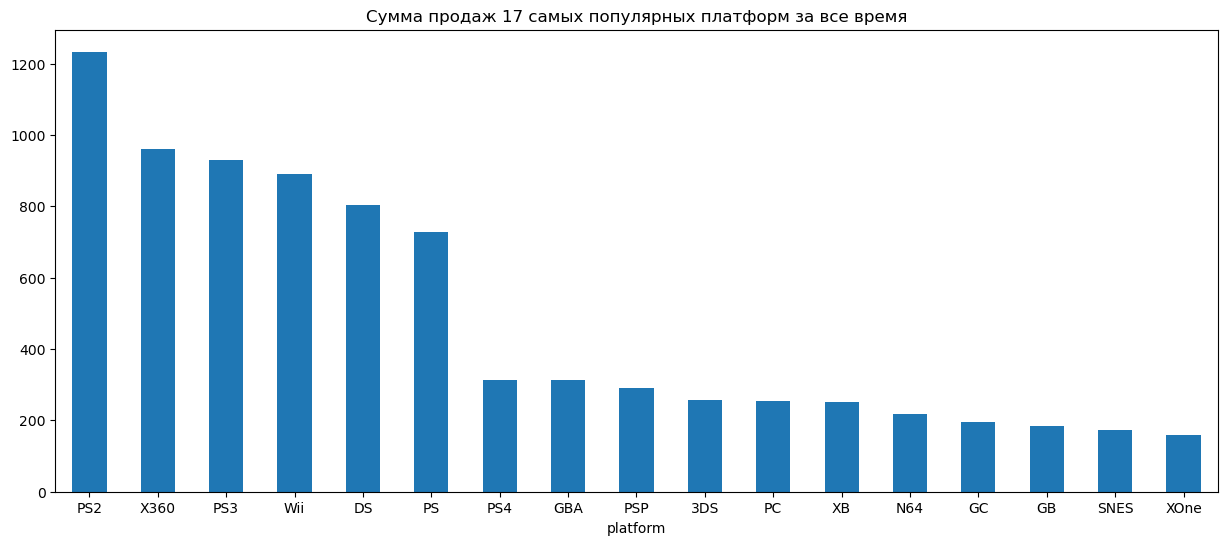

In [21]:
top_platform.plot(kind ='bar', 
                  x='platform', 
                  y='total_sales', 
                  rot=0,
                  title='Сумма продаж 17 самых популярных платформ за все время', 
                  legend=False,
                  figsize=(15,6));

Отберем топ-17 платформ с наибольшими продажами. И из общего датасета вышерем игры с этим топом платформ.

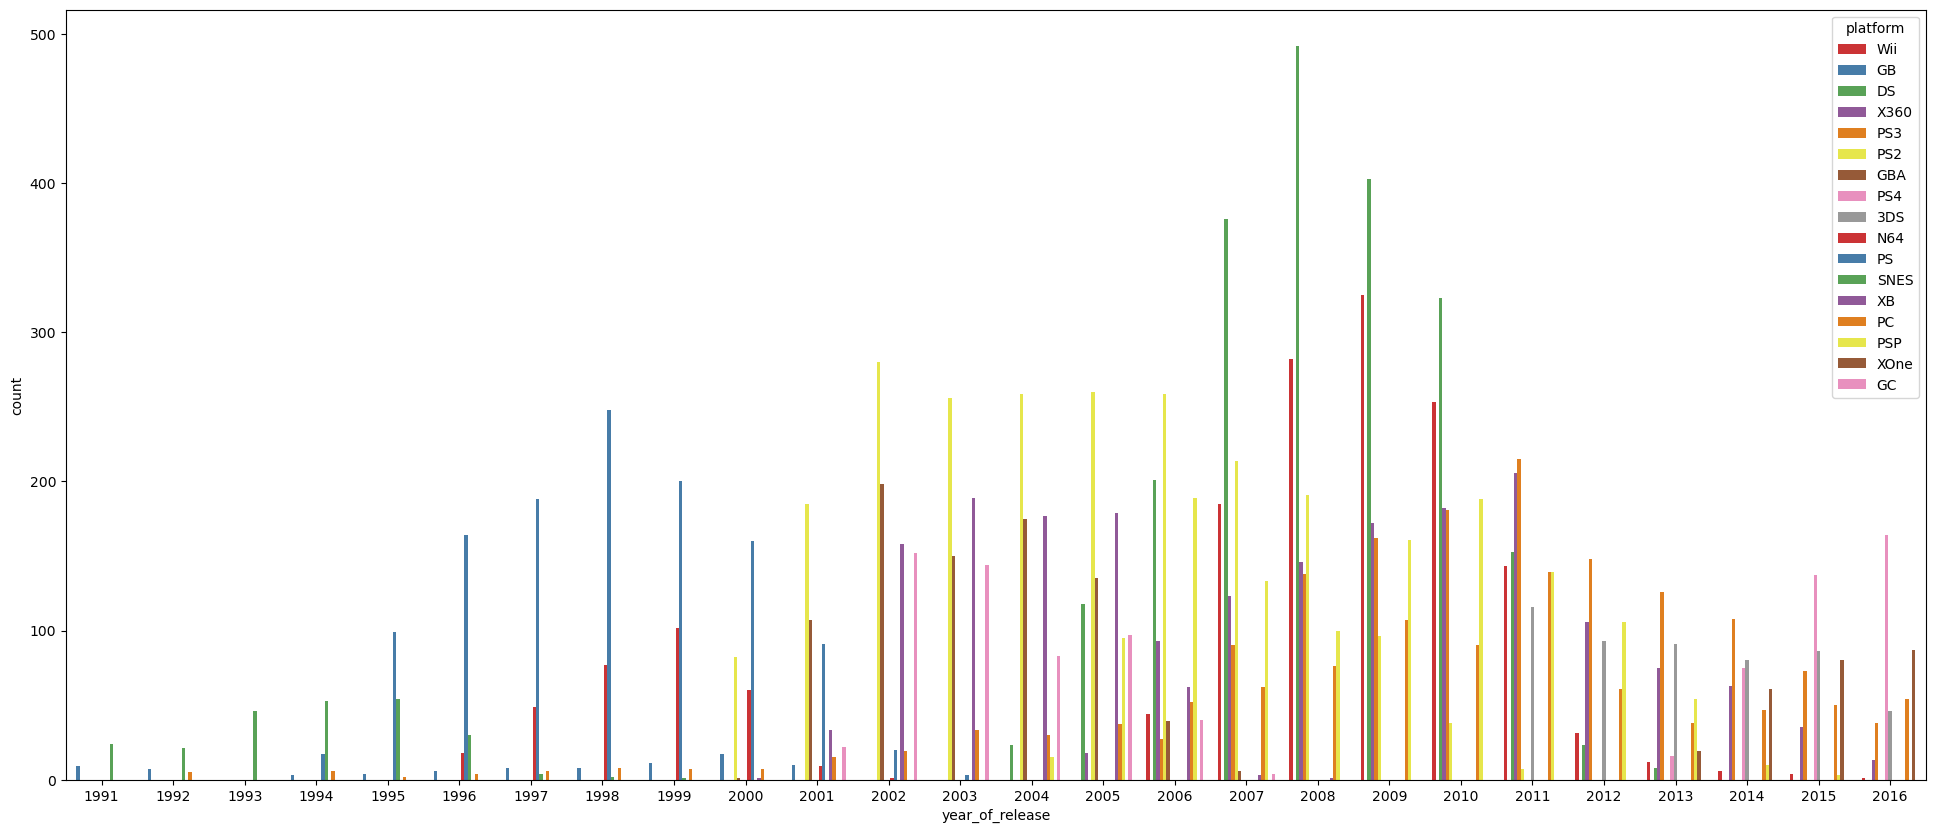

In [22]:
data_top_platform = data.query('platform in @top_platform_list')

fig = plt.gcf()
fig.set_size_inches(24, 10)

sns.countplot(x = 'year_of_release',
              hue = 'platform',
              data = data_top_platform, 
              palette = "Set1");

Взглянув на то, как распределяются топ-10 платформ по суммарным продажам с 1992 по 2016, можно сделать выводы:
 * В течение определенных периодов происходит смена самых популярных платформ, оно и логично, ведь с 1992 по 2016 активно  усовершенствуется оборудование для геймеров и улучшается качетсво игр, соответвтвенно платформы приходится менять.
 * Период за который происходит смена платформы с течение времени уменьшается, а именно:
     - PS была в топе с 1994 по 2000 год, то есть 7 лет
     - PS2 была в топе с 2001 по 2006 год, то есть 6 лет
     - DS была в топе с 2007 по 2010 год, то есть 4 года и т.д.  
 * Характерный срок за который попявляются и исчезают платформы около 10 лет, но срок уменьшается с каждой новой платформой, если не считать PC. PC вне оценки.
 * Актуальный период за которые мы берем данные для прогноза 2017 года будет 2014, 2015, 2016 год. (Примерно "Характерный срок за который появляются и исчезают платформы" деленный пополам)

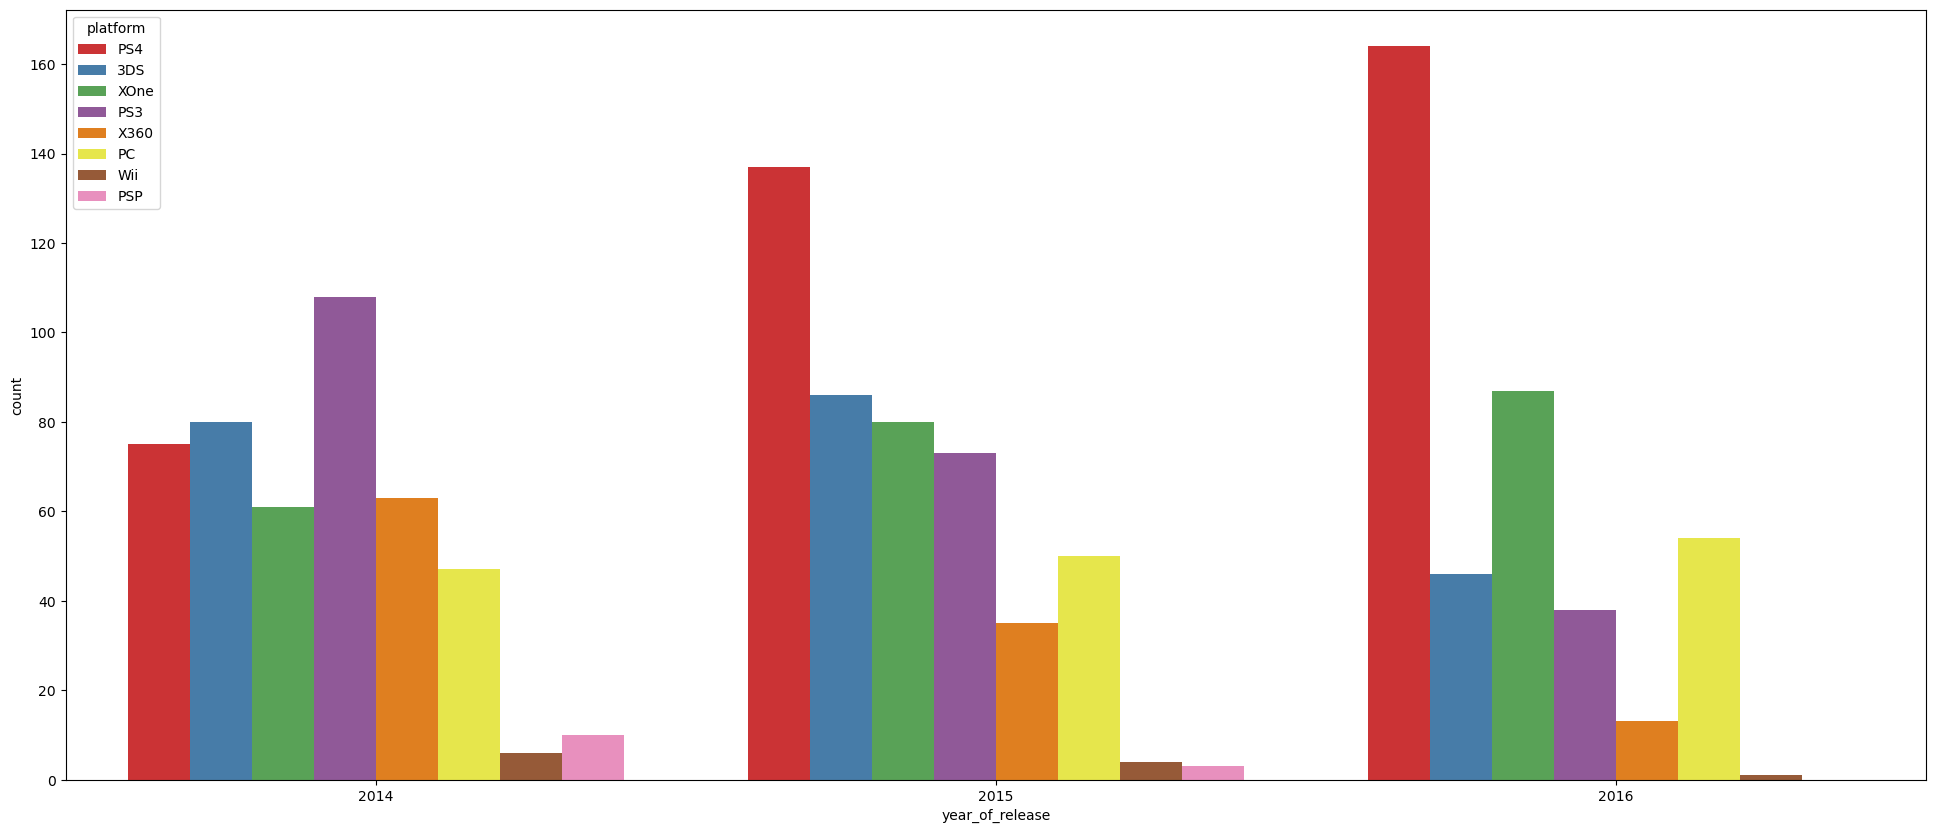

In [23]:
data_top_platform_current_time = data_top_platform.query('year_of_release in [2014, 2015, 2016]')

fig = plt.gcf()
fig.set_size_inches(24, 10)

sns.countplot(x ='year_of_release',
              hue ='platform',
              data = data_top_platform_current_time, 
              palette = "Set1");

Определившись с актуальным периодом рассмотрим его поподробнее.  
Заметный рост продаж отчетливо виден у PS4, менее выраженный у Xbox One, также по немного прибавляют продажи PC.


# 3.3 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [24]:
current_time = [2014, 2015, 2016]
top3_platform = ['PS4','XOne','PC']
data_3top_platform = data_top_platform.query('(year_of_release in @current_time) & (platform in @top3_platform)')

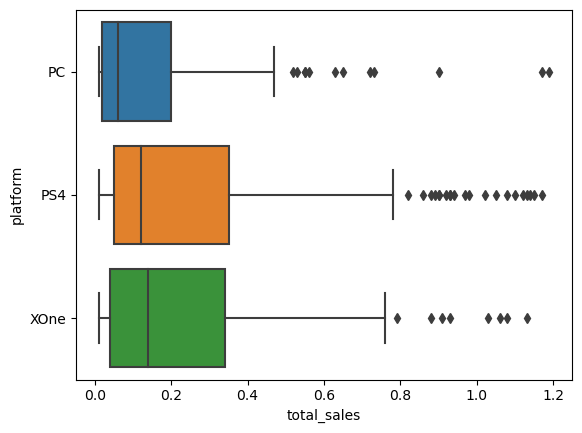

In [25]:
sns.boxplot(data=data_3top_platform.query('total_sales < 1.2'), y="platform", x="total_sales");

Потенциально самой прибыльной платформой может быть как Xbox One, так и PS4. На то есть причины у каждой, а именно:  
* PS4 может, т.к. имеет более явную тенденцию роста продаж за актуальный период. Также в абсолютном значении каждый последний год лидирует PS4.
* Xbox One в свою очередь хоть и имеет меньшие суммарные продажи по годам, но медианное же значение продаж больше, чем у PS4. Соответственно игры более стабильно набирают средние цифры. Если у Xbox One в 2017 году будем больше бестселлер, то есть все шансы стать самой прибыльной платформой.    


# 3.4 Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

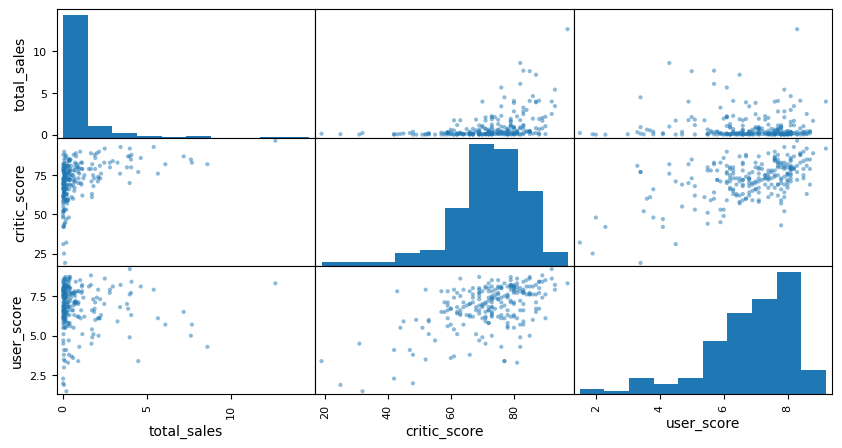

In [26]:
data_top_PS4 = data_top_platform.query('(year_of_release in @current_time) & (platform == "PS4")')
pd.plotting.scatter_matrix(data_top_PS4[['total_sales', 'critic_score', 'user_score']], figsize=(10,5))
plt.show()

In [27]:
data_top_PS4[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Построим матрицу диаграмм рассеяния и посчитаем корреляцию между отзывами и продажами для самой популярной платформы - PS4.  
Можно сделать выводы, что зависимость между отзывами критиков продажами есть, но умеренная и коэфф. корреляции равна 0.4 (по шкале Чеддока), что означает, что чем лучше отзывы, тем больше продаж.
А зависимости между отзывами игроков и продажами нет, коэфф. корреляции равен -0.04.

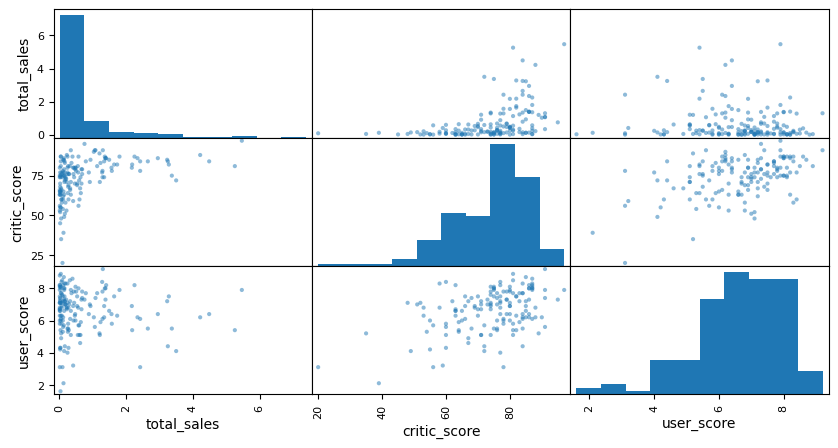

In [28]:
data_top_XOne = data_top_platform.query('(year_of_release in @current_time) & (platform == "XOne")')
pd.plotting.scatter_matrix(data_top_XOne[['total_sales', 'critic_score', 'user_score']], figsize=(10,5))
plt.show()

In [29]:
data_top_XOne[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


Рассмотрим матрицу диаграмм рассеяния и посчитаем корреляцию между отзывами и продажами для  платформы - XOne.  
Можно сделать выводы, что зависимости и коэфф. корреляции схожие с платформой PS4. Вероятно игроки консолей обращают больше внимания на отзывы перед покупкой.

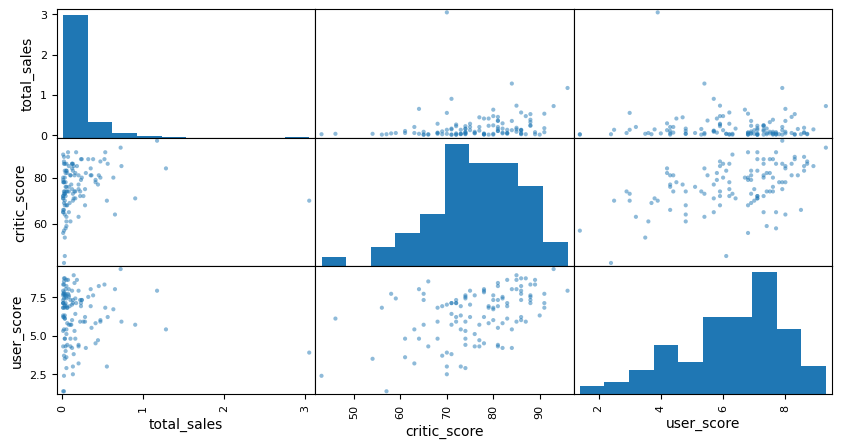

In [30]:
data_top_PC = data_top_platform.query('(year_of_release in @current_time) & (platform == "PC")')
pd.plotting.scatter_matrix(data_top_PC[['total_sales', 'critic_score', 'user_score']], figsize=(10,5))
plt.show()

In [31]:
data_top_PC[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


Если же взглянем на зависимоти у платформы PC, тут не наблюдает никакой зависимости. Как будто отзывы и продажи у РС это две разные вселенные или имеют совсем не линейную регрессию.

# 3.5 Описание самых прибыльных жанров.

In [32]:
data_current_time_genre = data.query('year_of_release in @current_time') \
                     .groupby('genre', as_index=False) \
                     .agg({'total_sales':'median'}) \
                     .rename(columns={'total_sales':'median_total_sales'}) \
                     .sort_values('median_total_sales',ascending=False) \
                     .head()

data_current_time_genre

,genre,median_total_sales
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110


Рассмотрим топ 5 жанров  по медианным значениям продаж за игру в предложенном датасете за последние 3 года.  
Явно выделяются шутеры. Шутеры подходят для совместной и быстрой игры компанией, опять же не в последнюю очередь популярность шутерам приносит киберспорт, поэтому берет их большое количество человек. 
Жанры: Sports, Platform, Fighting, Role-Playing приблизительно равны между собой и сильно отслают от шутеров.

# 4. Составление портрета пользователя каждого региона (NA, EU, JP)

## 4.1 Самые популярные платформы (топ-5).

In [33]:
data_na_sales = (data.query('year_of_release in @current_time') \
    .groupby('platform', as_index=False) \
    .agg({'na_sales':'sum'})) \
    .rename(columns={'na_sales':'sum_na_sales'})


data_na_sales['share_na_sales'] = data_na_sales['sum_na_sales'] / data_na_sales['sum_na_sales'].sum()

data_na_sales.sort_values('sum_na_sales', ascending=False).head()

,platform,sum_na_sales,share_na_sales
3,PS4,98.61,0.347145
9,XOne,81.27,0.286102
8,X360,28.30,0.099627
0,3DS,22.64,0.079701
2,PS3,22.05,0.077624


Выведем топ-5 платформ у пользователей Америки.  
На фоне остальных в Америке выделяются домашние игровые консоли последнего поколения. Характеризуется это тем, что играют они с комфортом дома(в помещении) и не сильно экономят на игровых платформах(приставках/пк и играх на них соответственно)

In [34]:
data_eu_sales = (data.query('year_of_release in @current_time') \
    .groupby('platform', as_index=False) \
    .agg({'eu_sales':'sum'})) \
    .rename(columns={'eu_sales':'sum_eu_sales'})

data_eu_sales['share_eu_sales'] = data_eu_sales['sum_eu_sales'] / data_eu_sales['sum_eu_sales'].sum()

data_eu_sales.sort_values('sum_eu_sales', ascending=False).head()

,platform,sum_eu_sales,share_eu_sales
3,PS4,130.04,0.480420
9,XOne,46.25,0.170866
2,PS3,25.54,0.094355
1,PC,17.97,0.066388
0,3DS,16.12,0.059554


Топ-5 платформ у пользователей Европы.  
Картина аналогична Америке.


In [35]:
data_jp_sales = (data.query('year_of_release in @current_time') \
    .groupby('platform', as_index=False) \
    .agg({'jp_sales':'sum'})) \
    .rename(columns={'jp_sales':'sum_jp_sales'})

data_jp_sales['share_jp_sales'] = data_jp_sales['sum_jp_sales'] / data_jp_sales['sum_jp_sales'].sum()

data_jp_sales.sort_values('sum_jp_sales', ascending=False).head()

,platform,sum_jp_sales,share_jp_sales
0,3DS,44.24,0.475239
3,PS4,15.02,0.161349
5,PSV,14.54,0.156193
2,PS3,11.22,0.120529
7,WiiU,7.31,0.078526


Топ-5 платформ у пользователей Японии.  
В Японии же ярко выделяется продажа игр, выпущенных на игровую платформу *3DS*(портативная платформа). Полагаю это связано с тем, что у японцев мало времени на игры и единственное время для игр у них в дороге или несколько минут в перерывал между работой.

## 4.2 Самые популярные жанры (топ-5).

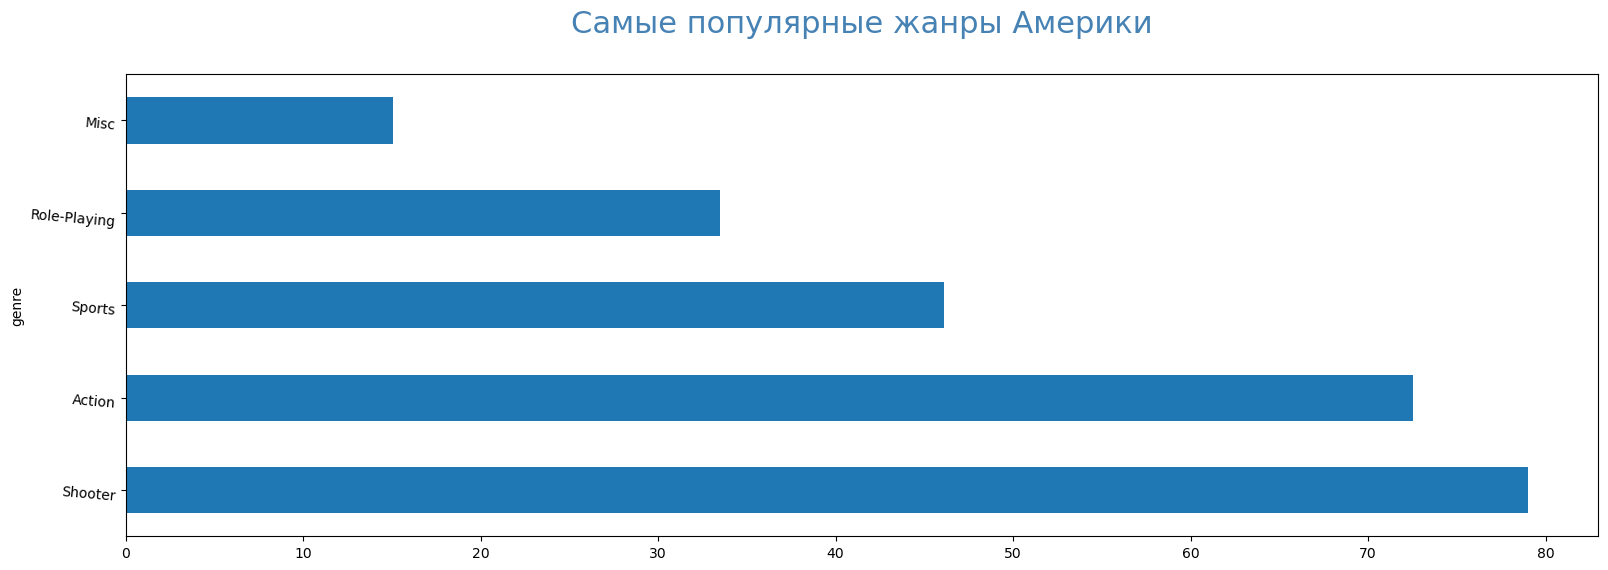

In [36]:
( 
    data.query('year_of_release in @current_time')
    .groupby('genre')
    .agg({'na_sales':'sum'})
    .rename(columns={'na_sales':'sum_na_sales'})
    .sort_values('sum_na_sales', ascending=False)
    .head()
    .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False)
    .set_title('Самые популярные жанры Америки' + "\n", fontsize = 22, color = 'SteelBlue')
);

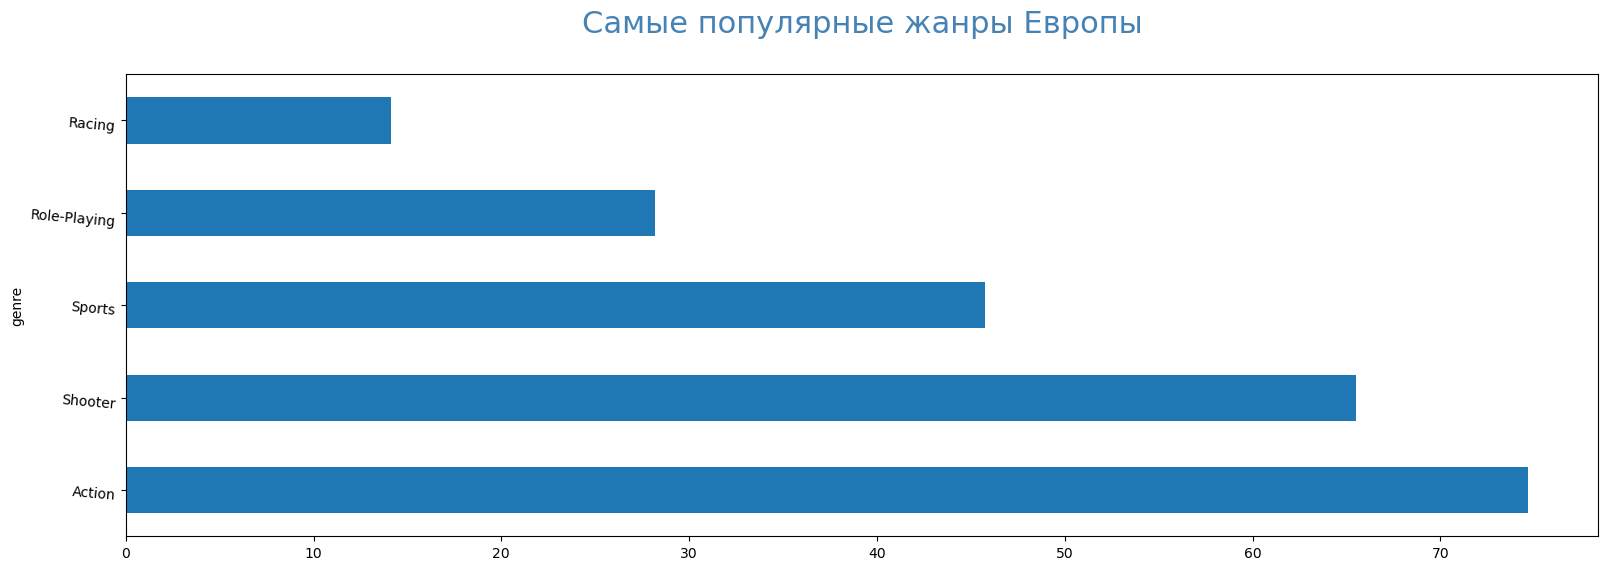

In [37]:
( 
    data.query('year_of_release in @current_time')
    .groupby('genre')
    .agg({'eu_sales':'sum'})
    .rename(columns={'eu_sales':'sum_eu_sales'})
    .sort_values('sum_eu_sales', ascending=False)
    .head()
    .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False)
    .set_title('Самые популярные жанры Европы' + "\n", fontsize = 22, color = 'SteelBlue')
);

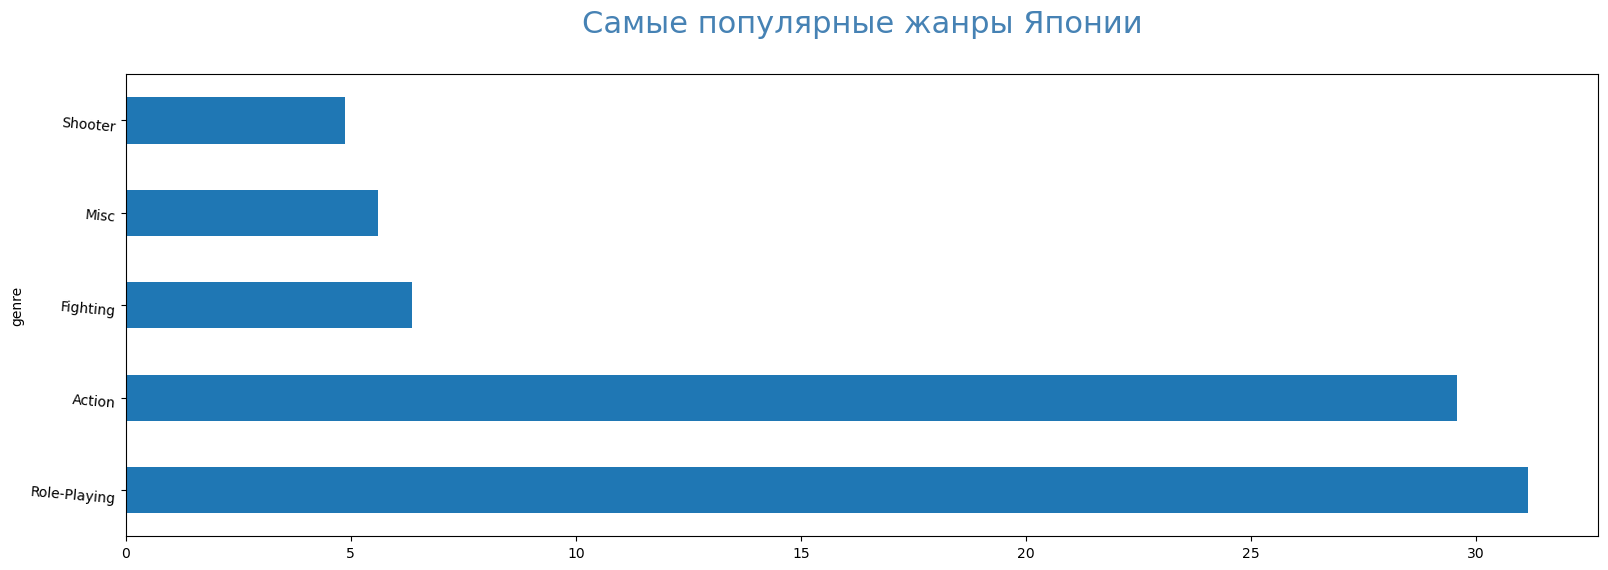

In [38]:
( 
    data.query('year_of_release in @current_time')
    .groupby('genre')
    .agg({'jp_sales':'sum'})
    .rename(columns={'jp_sales':'sum_jp_sales'})
    .sort_values('sum_jp_sales', ascending=False)
    .head()
    .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False)
    .set_title('Самые популярные жанры Японии' + "\n", fontsize = 22, color = 'SteelBlue')
);

Из графиков видно, что:  
* В Америке и Европе распределение самых продаваемых жанров имеет плавно убывающий характер, то есть нет одного двух-жанров которые покупает подавляющее большинство , а остальные отстают в 5-10 раз по продажам.
* В Японии ситуация обратная, жанры: Action и Role-Playing сильно выделяются и препоскодят другие жанры по продажам многократно.

## 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [39]:
data_current_time_with_rating = data.query('(year_of_release in @current_time) and not(rating.isna())')
total_data_current_time_with_rating = ( 
     data_current_time_with_rating.groupby('rating')
     .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
     .rename(columns={'jp_sales':'sum_jp_sales', 'na_sales':'sum_na_sales', 'eu_sales':'sum_eu_sales'})
)
total_data_current_time_with_rating

,sum_na_sales,sum_eu_sales,sum_jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78


Построим таблицу с распределением суммарных продаж в Америке, Европе и Японии по рейтингам.  
Но к сожалению сложно разобраться с данными, требуются круговые диаграммы.

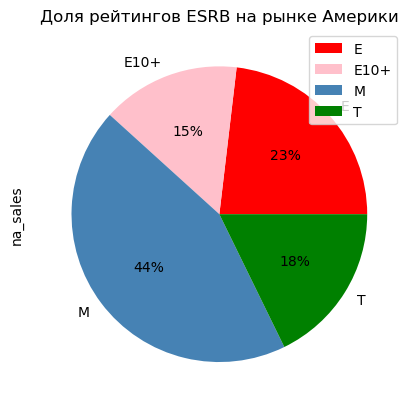

In [40]:
(
    data_current_time_with_rating
    .groupby('rating')
    .agg({'na_sales':'sum'})
    .plot(kind='pie', y='na_sales', autopct='%1.0f%%',
          colors = ['red', 'pink', 'steelblue', 'green'],
          title='Доля рейтингов ESRB на рынке Америки')
);

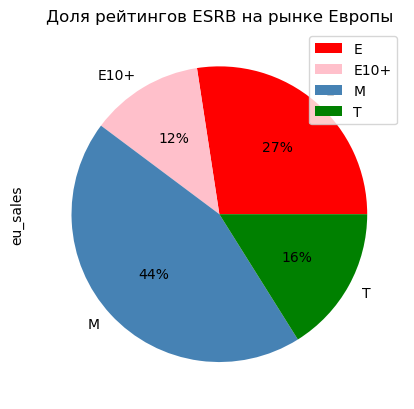

In [41]:
(
    data_current_time_with_rating
    .groupby('rating')
    .agg({'eu_sales':'sum'})
    .plot(kind='pie', y='eu_sales', autopct='%1.0f%%',
          colors = ['red', 'pink', 'steelblue', 'green'],
          title='Доля рейтингов ESRB на рынке Европы')
);

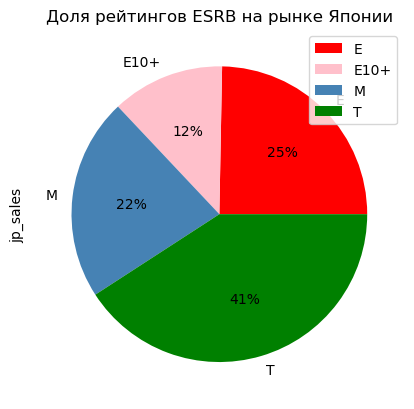

In [42]:
(
    data_current_time_with_rating
    .groupby('rating')
    .agg({'jp_sales':'sum'})
    .plot(kind='pie', y='jp_sales', autopct='%1.0f%%',
          colors = ['red', 'pink', 'steelblue', 'green'],
          title='Доля рейтингов ESRB на рынке Японии')
);

Построив круговые диаграммы можно смело говорить о том, как тот или иной возрастной рейтинг влияет на продажи по регионам. Из них видно:  
* В Америке  и Еыропе преобрадают игры "для взрослых", немного менее популярны игры "для всех".
* В Японии же преобладает жанр "Подросткам"(почти половина продаж), в два раза меньше продаж у игр с категориями: "для взрослых" и «Для всех от 10 лет и старше»

In [43]:
data_current_time_without_rating = data.query('(year_of_release in @current_time) and (rating.isna())')
data_current_time_without_rating_by_years = ( 
     data_current_time_without_rating.groupby('year_of_release')
     .agg({'na_sales':'mean', 'eu_sales':'mean', 'jp_sales':'mean'})
     .rename(columns={'jp_sales':'mean_jp_sales', 'na_sales':'mean_na_sales', 'eu_sales':'mean_eu_sales'})
     .reset_index()
     
)
data_current_time_without_rating_by_years

,year_of_release,mean_na_sales,mean_eu_sales,mean_jp_sales
0,2014,0.115593,0.098475,0.101737
1,2015,0.099347,0.097045,0.063814
2,2016,0.038423,0.033649,0.064505


In [44]:
data_current_time_with_rating_by_years = ( 
     data_current_time_with_rating.groupby('year_of_release')
     .agg({'na_sales':'mean', 'eu_sales':'mean', 'jp_sales':'mean'})
     .rename(columns={'jp_sales':'mean_jp_sales', 'na_sales':'mean_na_sales', 'eu_sales':'mean_eu_sales'})
     .reset_index()
)
data_current_time_with_rating_by_years

,year_of_release,mean_na_sales,mean_eu_sales,mean_jp_sales
0,2014,0.304319,0.288406,0.045449
1,2015,0.247460,0.217397,0.049270
2,2016,0.130000,0.156250,0.017821


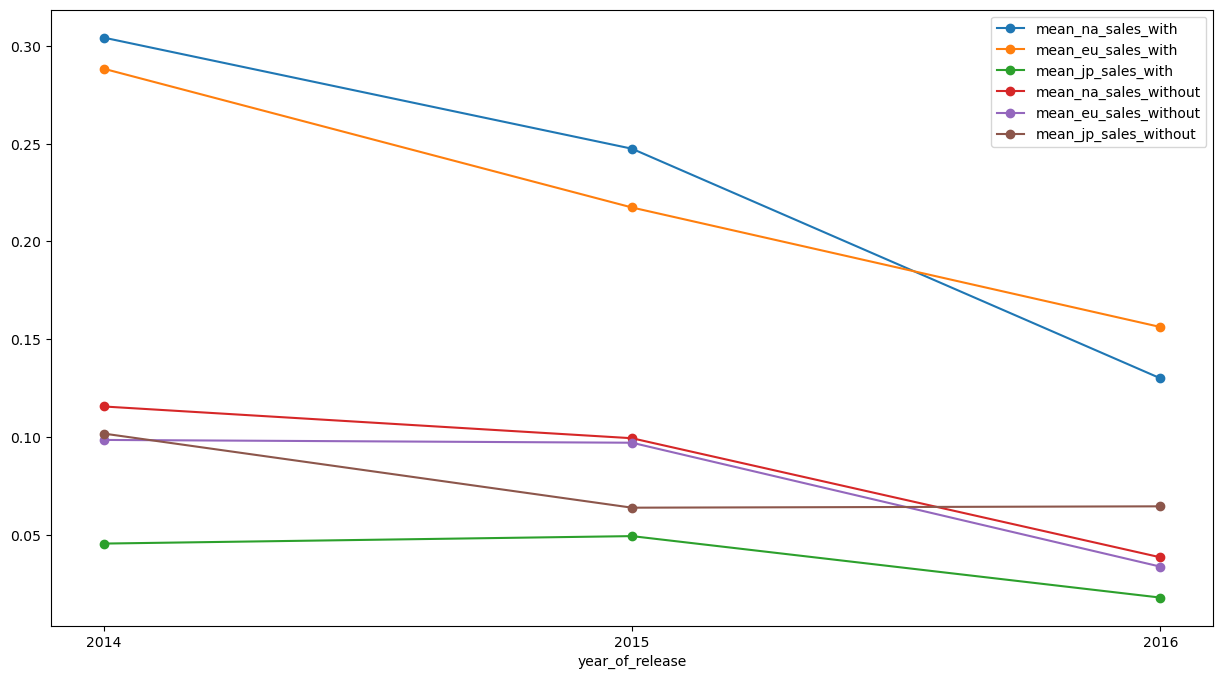

In [45]:
data_current_time = data_current_time_with_rating_by_years.merge(data_current_time_without_rating_by_years,
                                                                 on='year_of_release',
                                                                 suffixes=('_with','_without'))
data_current_time.plot(x='year_of_release',
                       figsize=(15,8),
                       style='o-',
                       xticks=current_time);

Проведя анализ по средним продажам игр, сравнивая их по регионам и наличию рейтинга ESRB, можно смело сказать, что:
> На продажи игр в Америке и Европе и Японии сильно влияет рейтинг ESRB, в среднем рейтинг удваивает продажи.

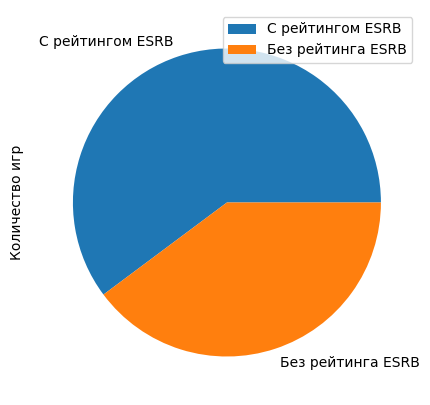

In [46]:
quantity_game_without_rating = data['na_sales'].loc[data['rating'].isna()].count()
quantity_game_with_rating = data.shape[0] - quantity_game_without_rating

df = pd.DataFrame({'Количество игр': [quantity_game_with_rating, quantity_game_without_rating]},
                  index=['С рейтингом ESRB', 'Без рейтинга ESRB'])
plot = df.plot.pie(y='Количество игр', figsize=(5, 5))

Доля игр с рейтингом около 64% процентов. Соответственно мы можем говорить о раздичии средних, основываясь на сравнении срех по каждому региону.

In [47]:
na_sales_without_rating = data['na_sales'].loc[data['rating'].isna()]
na_sales_with_rating = data.query('not rating.isna()')['na_sales']

list_na_sales_without_rating = na_sales_without_rating.tolist()
list_na_sales_with_rating = na_sales_with_rating.tolist()

for i in range(len(list_na_sales_with_rating)-len(list_na_sales_without_rating)):
    list_na_sales_with_rating.pop()

na_sales_with_rating = pd.Series(list_na_sales_with_rating)

results = st.ttest_ind(na_sales_with_rating, na_sales_without_rating)
print('Тест Стьюдента', '\n','p-значение:', results.pvalue, '\n')

Тест Стьюдента 
 p-значение: 1.7997556683649881e-113 



Подкрепим наши выводы тестом Стьюдента. Уровняем объемы выборок и сравним средние.  
    За нулевую гипотезу примем равенство средних сумм продаж игр(рейтинг ESRB не влияет на продажи), альтернативная же, что средние суммы продаж игр не равны.  
Результат p<0.05, соответственно, мы обнаружили статисчитески значемые различия в средних и можем отвергнуть нулевую гипотезу. Следовательно рейтинг ESRB влияет на продажи игр.

# 5. Проверка гипотез

## 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

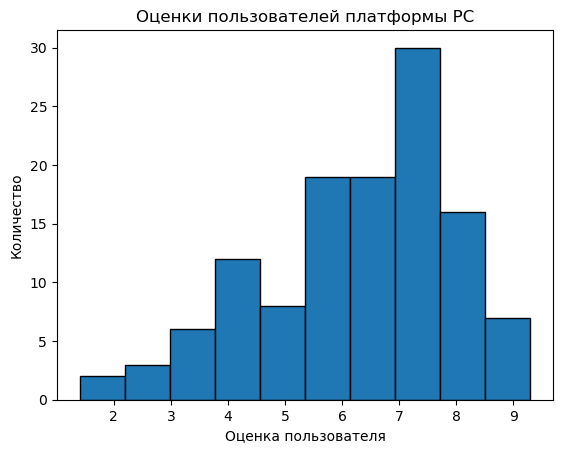

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


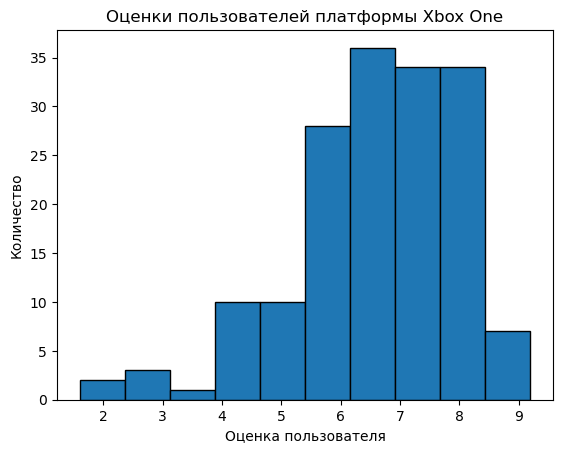

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [48]:
data_current_time_PC_with_user_score = data.query('(year_of_release in @current_time) and \
                                      (platform == "PC") and  (not user_score.isna())') \
                                      ['user_score'].reset_index(drop=True)

data_current_time_X1_with_user_score = data.query('(year_of_release in @current_time) and  \
                                      (platform == "XOne") and  (not user_score.isna())') \
                                      ['user_score'].reset_index(drop=True)

plt.hist(data_current_time_PC_with_user_score,edgecolor='black', bins =10)
plt.title('Оценки пользователей платформы PC') 
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество')
plt.show()
print(data_current_time_PC_with_user_score.describe())

plt.hist(data_current_time_X1_with_user_score,edgecolor='black', bins =10)
plt.title('Оценки пользователей платформы Xbox One') 
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество')
plt.show()
data_current_time_X1_with_user_score.describe()

Сделаем две выборки по платформам Xbox и PC с пользовательскими рейтингами. У них примерно одинаковая дисперсия, средние, но разное число наблюдений. Сократив рандомом(для чистоты эксперемента) количество наблюдений у платформы Xbox One, чтобы количество наблюдений стало одинаковыми.

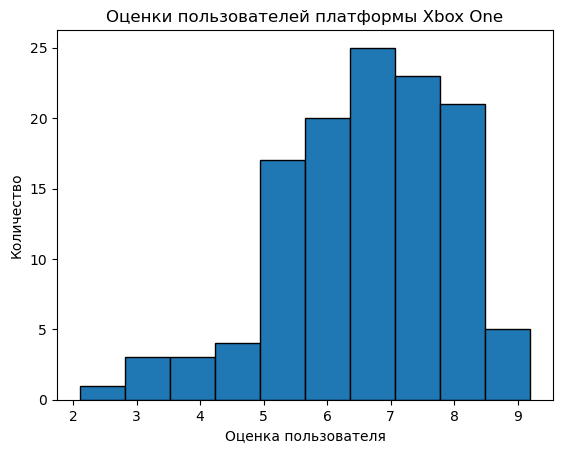

count    122.000000
mean       6.583607
std        1.325800
min        2.100000
25%        5.725000
50%        6.800000
75%        7.500000
max        9.200000
dtype: float64

In [49]:
list_X1 = data_current_time_X1_with_user_score.tolist()
list_PC = data_current_time_PC_with_user_score.tolist()

for i in range(len(list_X1)-len(list_PC)):
    list_X1.pop()

data_current_time_X1_with_user_score = pd.Series(list_X1)
plt.hist(data_current_time_X1_with_user_score,edgecolor='black', bins =10)
plt.title('Оценки пользователей платформы Xbox One') 
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество')
plt.show()
data_current_time_X1_with_user_score.describe()

Поправили, теперь выборки одного размера. Можно применять тесты.  
Зададим нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Соответственно, альтернативная гипотеза,  что средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [50]:
results = st.ttest_ind(data_current_time_X1_with_user_score, data_current_time_PC_with_user_score)
print('p-значение:', results.pvalue)

p-значение: 0.14567493090487835


In [51]:
results = st.mannwhitneyu(data_current_time_X1_with_user_score, data_current_time_PC_with_user_score, alternative='two-sided')
print('p-значение:', results.pvalue)

p-значение: 0.38372100546524346


Проведем t-тест Стьюдента т.к. сравнувиются средние двух генеральных, также для проверки используем U-тест Манна-Уитни.  
Выбор уровня значимости требует компромисса между значимостью и риском ошибки и, следовательно, между вероятностями ошибок первого и второго рода. Поэтому примем альфа 0.05.    
На основании двух тестов, а именно значений p-value, можно сказать, что значимых различий в средних пользовательских рейтингах не было найдено. Соответственно средние пользовательские рейтинги платформ Xbox One и PC вполне могут быть одинаковыми.

## 5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

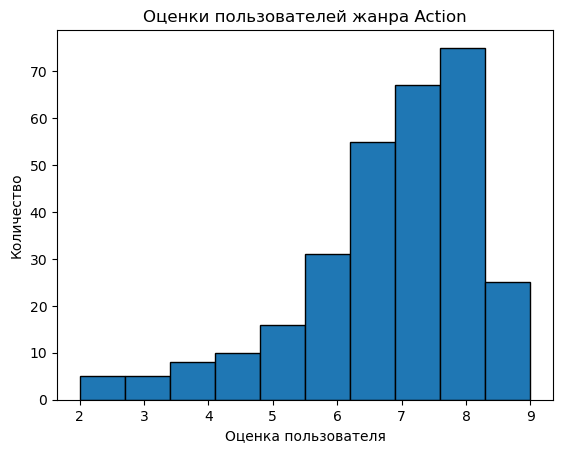

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64


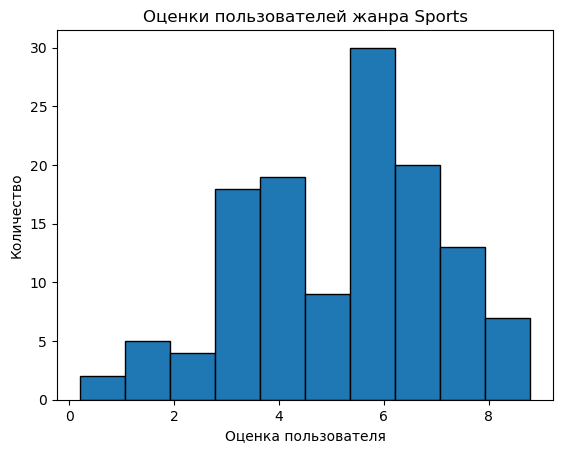

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

In [52]:
data_current_time_Action_with_user_score = data.query('(year_of_release in @current_time) and \
                                      (genre == "Action") and  (not user_score.isna())') \
                                      ['user_score'].reset_index(drop=True)

data_current_time_Sports_with_user_score = data.query('(year_of_release in @current_time) and  \
                                      (genre == "Sports") and  (not user_score.isna())') \
                                      ['user_score'].reset_index(drop=True)

plt.hist(data_current_time_Action_with_user_score,edgecolor='black', bins =10)
plt.title('Оценки пользователей жанра Action') 
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество')
plt.show()
print(data_current_time_Action_with_user_score.describe())

plt.hist(data_current_time_Sports_with_user_score,edgecolor='black', bins =10)
plt.title('Оценки пользователей жанра Sports') 
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество')
plt.show()
data_current_time_Sports_with_user_score.describe()

Также сделаем две выборки по жанрам Action и Sports с пользовательскими рейтингами. У них примерно одинаковая дисперсия, средние, но разное число наблюдений. Сократив рандомом(для чистоты эксперемента) количество наблюдений у жанра Action, чтобы количество наблюдений стало одинаковыми.

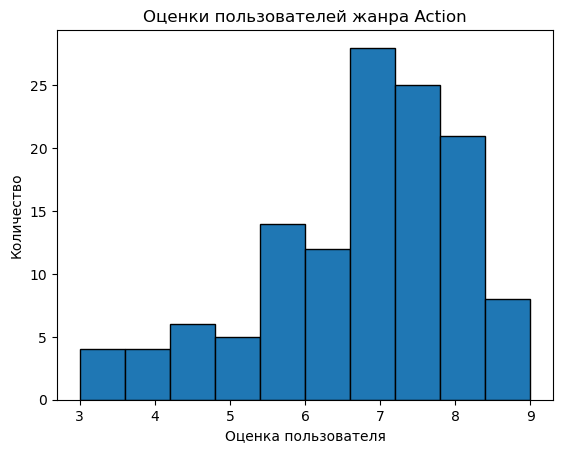

count    127.000000
mean       6.713386
std        1.340538
min        3.000000
25%        5.900000
50%        7.000000
75%        7.700000
max        9.000000
dtype: float64

In [53]:
list_Action = data_current_time_Action_with_user_score.tolist()
list_Sports = data_current_time_Sports_with_user_score.tolist()

for i in range(len(list_Action)-len(list_Sports)):
    list_Action.pop()

data_current_time_Action_with_user_score = pd.Series(list_Action)

plt.hist(data_current_time_Action_with_user_score,edgecolor='black', bins =10)
plt.title('Оценки пользователей жанра Action') 
plt.xlabel('Оценка пользователя')
plt.ylabel('Количество')
plt.show()

data_current_time_Action_with_user_score.describe()

Поправили, теперь выборки одного размера. Можно применять тесты.  
Зададим нулевую гипотезу, что средние пользовательские рейтинги жанра Action и Sports одинаковые.  
Соответственно, альтернативная гипотеза,  что средние пользовательские рейтинги жанра Action и Sports не равны.

In [54]:
results = st.ttest_ind(data_current_time_Action_with_user_score, data_current_time_Sports_with_user_score)
print('p-значение:', results.pvalue)

p-значение: 3.248693615039004e-12


In [55]:
results = st.mannwhitneyu(data_current_time_Action_with_user_score, \
                          data_current_time_Sports_with_user_score, alternative='two-sided')
print('p-значение:', results.pvalue)

p-значение: 1.8966677794576553e-11


Проведем t-тест Стьюдента т.к. сравнувиются средние двух генеральных, также для проверки используем U-тест Манна-Уитни.  
В данныи тестах тоже примем альфу равную 0.05.  
На основании двух тестов, а именно значений p-value, можно сказать, что мы обнаружили статистически значемые различия в средних пользовательских рейтингах жанров Action и Sports и мы можем отвергнуть нулевую гипотезу.

# 6. Общий вывод.

В ходе исследования, помимо изучения данных после предобработки, было описаны портреты некоторых регионов, а именно Америки и Европы и Японии. Подытоживая портреты, можно сказать следующее:

 * Америка и Европа почти идентичны, а если конкретнее, то:
   - Долю более 60% всех продаж игр занимают платформы PS4 и Xbox One.
   - Самыми популярными категориями являются Action и Shooter.
   - У обоих регионов доля 44% всех продаж игр занимает категория "для взрослых" и 16-18% категория "для всех".  


 * Япония имеет же совсем другие особенности:
   - Долю 47.5% всех продаж игр занимают платформы 3DS, портативной платформы.
   - Самый популярный жанр Role-Playing и немного отстает Action.
   - Долю 41% всех продаж игр занимает категория "подросткам", также около 20% имеют категории: "для взрослых" и «для всех от 10 лет и старше»  
   
Также в ходе работы были проверены три гипотезы и установлено:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

p-value теста Стьюдента и Мана-Уитни оказались значительно больше 0.05. Недостаточно оснований, чтобы её отвергнуть первую гипотезу.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

p-value теста Стьюдента равняется 3.24e-12, p-value теста Мана-Уитни равняется 1.89e-11, соответственно в обоих тестах меньше 0.05. Т.е. мы обнаружили статистически значемые различия в средних пользовательских рейтингах и можем отвергнуть данную гипотезу.
